# feature reduction 

In [121]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from scipy.stats import randint  
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

(101116, 23)


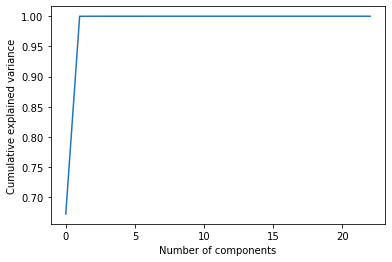

In [3]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset into a NumPy array or Pandas DataFrame
dataset = pd.read_csv('C:/Users/lenovo/Desktop/beats-arrythmia/CSV_data/selectedFeatures.csv')
# distributing the dataset into two components X and Y
X = dataset.drop('arrhytmia', axis=1)
y = dataset['arrhytmia']
print(X.shape)

# Fit PCA to the data and transform it to principal components
pca = PCA().fit(X)
X_pca = pca.transform(X)

# Plot the cumulative explained variance ratio as a function of the number of components
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

(101116, 23)
(75837, 10)
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0      2.088500  2.390794 -0.545134  0.610245  0.395059  1.418222 -0.736225   
1     -0.557082 -1.420569 -0.095157  0.003313  0.782244 -0.522454 -0.038480   
2      1.009172 -2.169684 -1.036730  0.378131  0.840063 -0.554564 -0.107217   
3     -2.693128  0.565603  0.957069  0.170361 -0.075092  1.222483 -0.218258   
4     -1.108481  0.909726  0.323656 -0.587612  0.034006 -0.400846 -0.043523   
...         ...       ...       ...       ...       ...       ...       ...   
75832 -1.363823 -1.376689 -1.579542  0.835896  0.104483  2.009901 -0.171843   
75833 -1.318918 -0.901676  1.371465 -2.253863 -0.096892 -0.696368  0.511273   
75834  1.672818  1.063137 -1.124535 -0.649212  0.069655  1.529718 -0.534237   
75835 -1.744809  0.814930  0.462678  0.761778  0.658248  1.525860 -0.579944   
75836 -0.654623  0.629821  2.451693 -0.902543 -0.958634 -0.730450  0.120370   

            PC8       PC9 

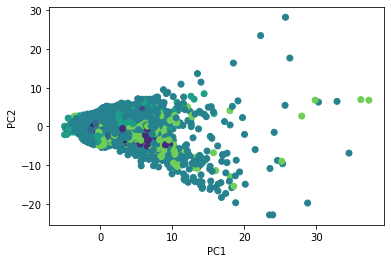

In [57]:
# dataset
dataset = pd.read_csv('C:/Users/lenovo/Desktop/beats-arrythmia/CSV_data/selectedFeatures.csv')
# distributing the dataset into two components X and Y
X = dataset.drop('arrhytmia', axis=1)
y = dataset['arrhytmia']
print(X.shape)
#performing preprocessing part
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Applying PCA function on training
# and testing set of X component
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
print(X_train_pca.shape)
# Convert numpy arrays to pandas DataFrame
X_df = pd.DataFrame(X_train_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])
# Print the columns of X DataFrame
print(X_df)
# Print the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_
print('explained_variance: ' + str(explained_variance))
# Plot the transformed data first 2 columns with the highest variance
import matplotlib.pyplot as plt
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
# saving the dataframe into a csv file
X_df.to_csv('C:/Users/lenovo/Desktop/beats-arrythmia/CSV_data/features_after_reduction.csv')

In [30]:
# Train a Random Forest classification model on the reduced dataset
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_pca, y_train)

# Apply the same PCA transformation to the test data
X_test_pca = pca.transform(X_test)

# Evaluate the performance of the Random Forest model on the reduced dataset
score1= rfc.score(X_train_pca, y_train)
print("Random Forest accuracy on reduced dataset trained:", score1)
score2 = rfc.score(X_test_pca, y_test)
print("Random Forest accuracy on reduced dataset test:", score2)


Random Forest accuracy on reduced dataset trained: 0.9999604414731595
Random Forest accuracy on reduced dataset test: 0.9522924166304046


In [33]:
model_2 = LogisticRegression()
model_2.fit(X_train_pca,y_train)
print(model_2.score(X_train_pca,y_train))
print(model_2.score(X_test_pca,y_test))

0.735933647164313
0.738913722852961


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
model_3 = DecisionTreeClassifier()
model_3.fit(X_train_pca,y_train)
print(model_3.score(X_train_pca,y_train))
print(model_3.score(X_test_pca,y_test))

1.0
0.9090549467937814


In [58]:
X_test_pca = pca.transform(X_test)
model_4 = KNeighborsClassifier()
model_4.fit(X_train_pca,y_train)
print(model_4.score(X_train_pca,y_train))
print(model_4.score(X_test_pca,y_test))

0.9655840816487994
0.9545076941334705


In [60]:
model_5 = SVC(kernel='linear')
model_5.fit(X_train_pca,y_train)
print(model_5.score(X_train_pca,y_train))
print(model_5.score(X_test_pca,y_test))

0.7412081174097077
0.7453222042011155


In [116]:
#dataset
dataset = pd.read_csv('C:/Users/lenovo/Desktop/beats-arrythmia/CSV_data/selectedFeatures.csv')
# distributing the dataset into two components X and Y
X = dataset.drop('arrhytmia', axis=1)
y = dataset['arrhytmia']
print(X.shape)
#performing preprocessing part
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Applying PCA function on training
# and testing set of X component
lda = LinearDiscriminantAnalysis(n_components=5)
X_train_lda = lda.fit_transform(X_train, y_train)
print(X_train_lda.shape)
print(X_test.shape)
# Extract the coefficients of the LDAtransformation
# m=list(dataset.columns)
# print(m)
coefficients = pd.DataFrame(lda.coef_, columns=['MIN', 'MAX', 'MEAN', 'RMS', 'VAR', 'PEAK', 'P2P', 'CREST FACTOR', 'SKEW', 'KURTOSIS', 'VAR_f', 'MIN2', 'MAX2', 'MEAN2', 'RMS2', 'VAR2', 'STD2', 'POWER2', 'PEAK2', 'CREST FACTOR2', 'SKEW2', 'KURTOSIS2', 'VAR_f2'])

# Print the coefficients and label the reduced features
print("LDA coefficients:\n", coefficients)
print("Labeled reduced features:\n")
for i, feature in enumerate(X_train_lda.T):
    print("Reduced feature", i+1, ":", feature)
    for j, (name, weight) in enumerate(coefficients.iteritems()):
        print("- Contribution of", name, ":", weight[i])
    print()
# # Convert numpy arrays to pandas DataFrame
# X_df = pd.DataFrame(X_train_lda, columns=['PC1', 'PC2','PC3','PC4','PC5'])
# # Print the columns of X DataFrame
# print(X_df)
# # Plot the transformed data first 2 columns with the highest variance
# import matplotlib.pyplot as plt
# plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
# plt.xlabel('ld1')
# plt.ylabel('ld2')
# plt.show()

(101116, 23)
(75837, 5)
(25279, 23)
LDA coefficients:
         MIN       MAX      MEAN       RMS       VAR      PEAK       P2P  \
0 -0.186368  0.227565 -0.175981 -0.466293  0.125547 -1.394902  0.304357   
1  1.124397 -0.152860  0.198298 -1.300406  0.276446  3.027566 -0.876376   
2  0.599746  0.355521 -0.494334  0.281876  0.118411  0.328820 -0.123613   
3  0.590013  0.204926 -0.798470 -0.911587  0.026926  0.683008 -0.235543   
4 -0.248667 -0.204165  0.230045  0.003382 -0.025809  0.015553  0.006599   
5  1.400601  1.857444 -1.898426  1.360419 -0.843920 -1.597796  0.519434   
6  0.936988 -0.114769 -1.137270  1.365673  0.004209  0.086552 -0.720383   
7  0.439640 -0.038599  0.458028 -0.048070  0.998737  0.838907 -0.326009   
8  0.649491 -0.115665  0.173350 -0.724764  0.576970 -0.069559 -0.527757   
9  0.713476  0.394004 -1.220188 -1.599679 -0.360249  1.655857 -0.169817   

   CREST FACTOR      SKEW  KURTOSIS  ...     MEAN2      RMS2      VAR2  \
0      0.059818 -0.221188 -0.430499  ...  0.1

In [66]:
# Train a Random Forest classification model on the reduced dataset
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_lda, y_train)

# Apply the same PCA transformation to the test data
X_test_lda = lda.transform(X_test)

# Evaluate the performance of the Random Forest model on the reduced dataset
score1= rfc.score(X_train_lda, y_train)
print("Random Forest accuracy on reduced dataset trained:", score1)
score2 = rfc.score(X_test_lda, y_test)
print("Random Forest accuracy on reduced dataset test:", score2)

Random Forest accuracy on reduced dataset trained: 0.999947255297546
Random Forest accuracy on reduced dataset test: 0.9232564579295067


In [12]:
model_2 = DecisionTreeClassifier()
model_2.fit(X_train_lda,y_train)
print(model_2.score(X_train_lda,y_train))
print(model_2.score(X_test_lda,y_test))

1.0
0.8775663594287749


In [13]:
model_3 = SVC(kernel='linear')
model_3.fit(X_train_lda,y_train)
print(model_3.score(X_train_lda,y_train))
print(model_3.score(X_test_lda,y_test))

0.7605390508590794
0.7648245579334626


In [80]:
model_4 = LogisticRegression()
model_4.fit(X_train_lda,y_train)
print(model_4.score(X_train_lda,y_train))
print(model_4.score(X_test_lda,y_test))

0.7689122723736435
0.7757427113414297


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [25]:
model_5 = KNeighborsClassifier()
model_5.fit(X_train_lda,y_train)
print(model_5.score(X_train_lda,y_train))
print(model_5.score(X_test_lda,y_test))

0.9385128631143109
0.9233355749831876


In [81]:
#dataset
dataset = pd.read_csv('C:/Users/lenovo/Desktop/beats-arrythmia/CSV_data/selectedFeatures.csv')
# distributing the dataset into two components X and Y
X = dataset.drop('arrhytmia', axis=1)
y = dataset['arrhytmia']

# create LDA object
lda = LinearDiscriminantAnalysis(n_components=5)

# fit LDA model to the data
X_lda = lda.fit_transform(X, y)

# create k-fold cross-validation object
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

# create KNN model
model = KNeighborsClassifier()

# evaluate model using cross-validation
results5 = cross_val_score(model, X_lda, y, cv=kfold)
                                                                          
# print mean and standard deviation of accuracy scores
print("Accuracy: %.2f%% (%.2f%%)" % (results5.mean()*100, results5.std()*100))
print(results5)



Accuracy: 92.21% (0.36%)
[0.92494066 0.92296282 0.92355617 0.9257318  0.92484177 0.92523734
 0.92008703 0.91375729 0.9184057  0.92117496]


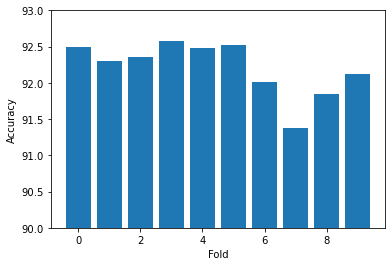

In [118]:
#Visualise the relation between the splitted folds and their accuracy
v=[0,1,2,3,4,5,6,7,8,9]
plt.bar(v,results5*100)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([90, 93])
plt.show()

In [119]:
# create RF model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# evaluate model using cross-validation
results3 = cross_val_score(model, X_lda, y, cv=kfold)

# print mean and standard deviation of accuracy scores
print("Accuracy: %.2f%% (%.2f%%)" % (results3.mean()*100, results3.std()*100))
print(results3)

Accuracy: 92.07% (0.30%)
[0.92464399 0.92098497 0.92276503 0.92434731 0.92029272 0.92068829
 0.92058154 0.91504302 0.91603204 0.92186727]


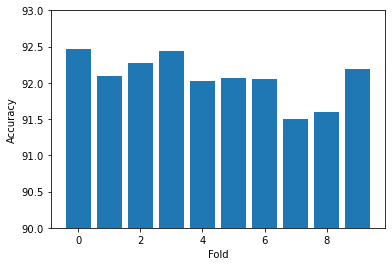

In [120]:
plt.bar(v,results3*100)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([90, 93])
plt.show()

In [33]:
# create logistic regression model
model = LogisticRegression()

# evaluate model using cross-validation
results2 = cross_val_score(model, X_lda, y, cv=kfold)

# print mean and standard deviation of accuracy scores
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Accuracy: 76.94% (0.49%)


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [114]:
# create DT model
model = DecisionTreeClassifier()

# evaluate model using cross-validation
results4 = cross_val_score(model, X_lda, y, cv=kfold)

# print mean and standard deviation of accuracy scores
print("Accuracy: %.2f%% (%.2f%%)" % (results4.mean()*100, results4.std()*100))
print(results4)

Accuracy: 87.49% (0.32%)
[0.87589003 0.87312104 0.87806566 0.87836234 0.87707674 0.8788568
 0.87211947 0.868559   0.8733063  0.8733063 ]


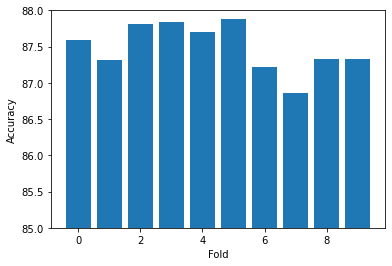

In [115]:
#Visualise the relation between the splitted folds and their accuracy
plt.bar(v,results4*100)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim([85, 88])
plt.show()

In [34]:
# create logistic regression model
model = SVC(kernel='linear')

# evaluate model using cross-validation
results = cross_val_score(model, X_lda, y, cv=kfold)

# print mean and standard deviation of accuracy scores
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 76.06% (0.50%)


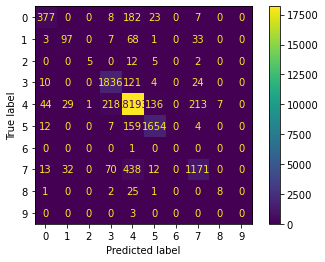

              precision    recall  f1-score   support

           0       0.82      0.63      0.71       597
           1       0.61      0.46      0.53       209
           2       0.83      0.21      0.33        24
           3       0.85      0.92      0.89      1995
           4       0.95      0.97      0.96     18841
           5       0.90      0.90      0.90      1836
           6       0.00      0.00      0.00         1
           7       0.81      0.67      0.73      1736
           8       0.53      0.22      0.31        37
           9       0.00      0.00      0.00         3

    accuracy                           0.92     25279
   macro avg       0.63      0.50      0.54     25279
weighted avg       0.92      0.92      0.92     25279



C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [124]:
model = KNeighborsClassifier()
model.fit(X_train_lda,y_train)
y_pred = model.predict(X_test_lda)
# Calculate the evaluation metrics
# cm = confusion_matrix(y_test,y_pred)
# cm
# color = 'white'
# matrix = plot_confusion_matrix(model, X_test_lda, y_test, cmap=plt.cm.Blues)
# matrix.ax_.set_title('Confusion Matrix', color=color)
# plt.xlabel('Predicted Label', color=color)
# plt.ylabel('True Label', color=color)
# plt.gcf().axes[0].tick_params(colors=color)
# plt.gcf().axes[1].tick_params(colors=color)
# plt.show()
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
color = 'white'
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show() 
print(classification_report(y_test, y_pred))